### Analysis of w+; UAS-ArcLight/ UAS-GluCl-RNAi; R38G02-Gal4/ R38G02-Gal4 Flies (RNAi flies)

In [113]:
# Python_version 2.7.15

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

import octopus as oct

In [114]:
filenames =['R38G02_ArcLight_GluClRNAi_SING_001_2020-03-11_11.44GluCl-RNAi_Ftrace_mean',
            '2020_05_06_R38G02_ArcLight_GluCl-RNAi001_2020-05-06_12.09GluCl-RNAi_Ftrace_mean',
            '2020_05_11_R38G02_ArcLight_GluCl-RNAi004_2020-05-11_12.36GluCl-RNAi_Ftrace_mean',
            '2020_05_11_R38G02_ArcLight_GluCl-RNAi007_2020-05-11_14.36GluCl-RNAi_Ftrace_mean',
            'R38G02_ArcLight_GluCl-RNAi001_2020-05-14_11.42GluCl-RNAi_Ftrace_mean',
            'R38G02_ArcLight_GluCl-RNAi010_2020-05-14_19.01GluCl-RNAi_Ftrace_mean',
            'R38G02_ArcLight_GluCl-RNAi001_2020-05-15_11.41GluCl-RNAi_Ftrace_mean',
            'R38G02_ArcLight_GluCl-RNAi003_2020-05-15_12.59GluCl-RNAi_Ftrace_mean']

In [115]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

In [116]:
R38G02_GluRIA_RNAi_Ftrace_mean = np.load('R38G02_GluRIA-RNAi_Ftrace_mean.npy')
R38G02_GluRIA_RNAi_Ftrace_sem = stats.sem(R38G02_GluRIA_RNAi_Ftrace_mean,1)
R38G02_GluRIA_RNAi_Ftrace_all = np.load('R38G02_GluRIA-RNAi_Ftrace_all.npy')

R38G02_GluRIA_RNAi_MOI = np.load('R38G02_GluRIA-RNAi_MOI.npy')
R38G02_GluRIA_RNAi_LDir = np.load('R38G02_GluRIA-RNAi_LDir.npy')

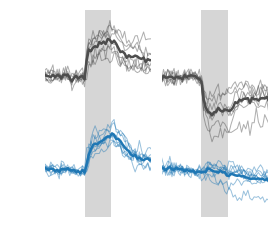

In [119]:
fig = plt.figure(figsize = (4, 3.8))

plt.subplots_adjust(wspace=0.1)

data = [R38G02_GluRIA_RNAi_Ftrace_all, Ftrace_all]
colors = ['0.3', 'C0']
vsize = 0.12
alpha = 0.45

ax = fig.add_subplot(121)
plt.plot(time, data[0][:,6,:] + vsize*1.4, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,6,:], axis=1)+ vsize*1.4, colors[0], linewidth = 2.5)

plt.plot(time, data[1][:,6,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[1][:,6,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize*0.7,+vsize*2.4])
plt.axis('off') 


ax = fig.add_subplot(122)
plt.plot(time, data[0][:,2,:] + vsize*1.4, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,2,:], axis=1)+ vsize*1.4, colors[0], linewidth = 2.5)

plt.plot(time,data[1][:,2,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time,np.mean(data[1][:,2,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize*0.7,+vsize*2.4])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig4_R38G02_GluClRNAi_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [120]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

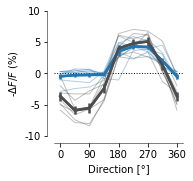

In [121]:
fig = plt.figure(figsize = (2.3,2.3))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

plt.plot(rotations, Ftrace_mean, color='C0', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C0')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C0')

plt.plot(rotations, R38G02_GluRIA_RNAi_Ftrace_mean, color='0.3', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(R38G02_GluRIA_RNAi_Ftrace_mean,1), linewidth = 2.5, color = '0.3')
plt.errorbar(rotations, np.mean(R38G02_GluRIA_RNAi_Ftrace_mean,1), yerr = R38G02_GluRIA_RNAi_Ftrace_sem, linewidth = 2.5, color = '0.3')


plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel(u'Direction [°]', fontsize = 10)
ax.set_ylabel('-$\Delta F/F$ (%)', fontsize = 10)
yticks = np.array([-0.1,-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
plt.ylim([-0.1,0.1])

bbox_inches = 'tight'
#plt.savefig('Fig4_R38G02_GluCl_DirTuning.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [122]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [123]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.12173998959786189   D_deg = 232.9260616897682
H_magn =0.0017757338078587125   H_deg = 250.26541676568525
MOI = 0.013923427504571042
D_magn =0.1328118321270119   D_deg = 236.03283328980865
H_magn =0.031111460034656046   H_deg = 230.58168346894655
MOI = 0.23319277846426742
D_magn =0.08870641125186784   D_deg = 232.11497428335153
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.1075358852192975   D_deg = 227.40484398239388
H_magn =0.010979004163203536   H_deg = 222.14413649260402
MOI = 0.10166614142241706
D_magn =0.06142594232939223   D_deg = 236.13525580718587
H_magn =0.0009426876660975939   H_deg = 315.0
MOI = 0.002963849710236193
D_magn =0.08616148582958426   D_deg = 277.4617636581071
H_magn =0.0165547029198016   H_deg = 338.65128600496604
MOI = 0.09259289847424505
D_magn =0.11592930087445608   D_deg = 235.63284878277594
H_magn =0.06079174306572582   H_deg = 230.80180587199433
MOI = 0.5225234036499825
D_magn =0.0790583415888805   D_deg = 238.71011053545843
H_magn =0.00195410898

In [124]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.12343616202409044   R_deg = 233.171713677105
R_indiv_magn = 0.19167288564084614
LDir = 0.6439938628324474
R_magn =0.16380925643351582   R_deg = 234.99902918007135
R_indiv_magn = 0.23823756076293237
LDir = 0.6875878677943679
R_magn =0.08870641125186784   R_deg = 232.11497428335153
R_indiv_magn = 0.13039207030836386
LDir = 0.6803052596840152
R_magn =0.11847292041578761   R_deg = 226.91800778803807
R_indiv_magn = 0.16087011993370104
LDir = 0.7364507496147422
R_magn =0.06161494241468736   R_deg = 236.99539108537172
R_indiv_magn = 0.11307977130909874
LDir = 0.5448803238756607
R_magn =0.09525041969609592   R_deg = 286.221332179854
R_indiv_magn = 0.15399177750391183
LDir = 0.6185422445278047
R_magn =0.17657931029717236   R_deg = 233.9713813981074
R_indiv_magn = 0.24554200949126992
LDir = 0.7191409350400813
R_magn =0.07954414171920866   R_deg = 240.07768356047256
R_indiv_magn = 0.12306475090197051
LDir = 0.6463600757829593


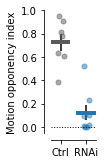

In [125]:
# Make Scatter Plot of MOI

pos = [0,1]
fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R38G02_GluRIA_RNAi_MOI, MOI_flies]
colors = ['0.35', 'C0']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'RNAi'), size=10)
ax.set_ylabel('Motion opponency index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('Fig4_R38G02_GluCl_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

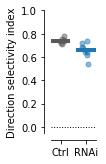

In [126]:
# Make Scatter Plot of LDir

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R38G02_GluRIA_RNAi_LDir, LDir_flies]
colors = ['0.35', 'C0']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'RNAi'), size=10)
ax.set_ylabel('Direction selectivity index', size=10)
#ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

#plt.savefig('Fig4_R38G02_GluCl_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [127]:
print(stats.shapiro(R38G02_GluRIA_RNAi_MOI))
print(stats.shapiro(MOI_flies))
print(stats.levene(MOI_flies, R38G02_GluRIA_RNAi_MOI))
print(stats.ttest_ind(R38G02_GluRIA_RNAi_MOI, MOI_flies, axis=0, equal_var=False))

(0.9457768201828003, 0.6911693215370178)
(0.7370897531509399, 0.0058737024664878845)
LeveneResult(statistic=0.21447965771100236, pvalue=0.6509361868860739)
Ttest_indResult(statistic=6.186109611177529, pvalue=4.099472871731344e-05)


In [128]:
print(stats.shapiro(R38G02_GluRIA_RNAi_LDir))
print(stats.shapiro(LDir_flies))
print(stats.levene(LDir_flies, R38G02_GluRIA_RNAi_LDir))
print(stats.ttest_ind(R38G02_GluRIA_RNAi_LDir, LDir_flies, axis=0, equal_var=False))

(0.9688547253608704, 0.890078067779541)
(0.9540826678276062, 0.7522268891334534)
LeveneResult(statistic=3.9342156583933794, pvalue=0.06884403502228426)
Ttest_indResult(statistic=3.4665261046967637, pvalue=0.006773756714810282)
